<a href="https://colab.research.google.com/github/dedemasutti/AI-projects/blob/master/Projeto_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imports

In [60]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model



#Carregando os dados

In [61]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, id_treino),(imagens_teste, id_teste)) = dataset.load_data()

#Explorando os dados

In [ ]:
imagens_treino

In [ ]:
len(imagens_treino)

In [64]:
imagens_treino.shape

(60000, 28, 28)

In [65]:
imagens_teste.shape

(10000, 28, 28)

In [66]:
id_treino.min()
id_treino.max()

9

#Exibindo os dados

<function matplotlib.pyplot.title>

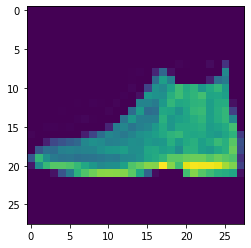

In [67]:
plt.imshow(imagens_teste[0])
plt.title

#

In [68]:

total_classificacoes = 10
nomes_de_classificacao = ['camiseta', 'calça','pullover', 'Vestido',
                         'Casaco','Sandália','Camisa','Tenis','Bolsa','Bota']

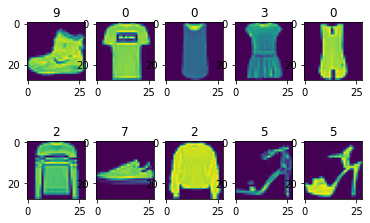

In [69]:
# fazemos um loop for para iterar em todas as 10 imagens e nos retornar o titulo de cada uma, conforme dataset
for imagem in range (10):
  plt.subplot(2,5, imagem + 1)
  plt.imshow(imagens_treino[imagem])
  plt.title(id_treino[imagem])


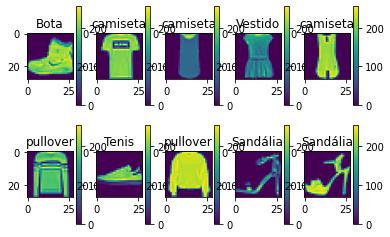

In [70]:
# Na visualização acima não aparecem os nomes no titulo das imagens.
# Tivemos que alterar o codigo e adicionarmos ao laço o nome_de_classificacao para iterar com os nomes pre definidos
for imagem in range (10):
  plt.subplot(2,5, imagem + 1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacao[id_treino[imagem]])
  plt.colorbar()


Criando, compilando, treinando e normalizando o modelo

In [71]:
# Criando o modelo sequencial.
# Dentro do modelo , criamos as camadas. 
# Uma rede neural de tres camadas: Flatten, ReLU e softmax. *A camada de input não conta
# A função ReLU(Rectfied Linear Units) introduz nas redes neurais profundas funções não lineares. Faz os valores menores que 0 se tornarem 0.
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)
])

modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')

modelo.fit(imagens_treino, id_treino)

#Apresentou uma perda(loss) de 3.4767. Vamos melhorar esse parametro

1875/1875 [==============================] - 5s 3ms/step - loss: 4.3102


#Normalização (normalizando as imagens)

In [72]:
# Dividimos os valores dos pixels por 255 para termos uma variação de 0 a 1. Processo de normalização
imagens_treino = imagens_treino/float(255)


In [73]:



modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)
])

modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')

modelo.fit(imagens_treino, id_treino)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.4869


In [74]:
#Adicionei mais uma camada com ReLU e a perda diminuiu. Porém, poderia ter aumentado..
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)
])

modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')

modelo.fit(imagens_treino, id_treino)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.5051


In [75]:
# Algumas alterações foram estabelecidas no intuito de melhorar o treino do modelo.
# Aumentando o número de epochs para 3 
modelo.fit(imagens_treino, id_treino, epochs = 5)
modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3890
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3551
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3344
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3181
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3045


##Predição (testando o modelo)

In [76]:
testes = modelo.predict(imagens_teste)
print('resultado teste', np.argmax(testes[0]))
print('número da imagem de teste:', id_teste[0])



resultado teste 9
número da imagem de teste: 9


#Avaliação e validação

In [77]:
# Usamos o método .evaluate para para avaliar quanto de perda e de acurácia tem o teste
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, id_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 68.3565 - accuracy: 0.8475
Perda do teste: 68.35652160644531
Acurácia do teste: 0.8475000262260437


In [78]:
# Vamos definir qual porcentagem do dataset será colocado para validação. no exemplo deixamos 15% ou 0.
modelo.fit(imagens_treino, id_treino, epochs = 3,validation_split = 0.15)



Epoch 1/3
1594/1594 [==============================] - 6s 3ms/step - loss: 0.2970 - accuracy: 0.8889 - val_loss: 0.2737 - val_accuracy: 0.8968
Epoch 2/3
1594/1594 [==============================] - 5s 3ms/step - loss: 0.2843 - accuracy: 0.8930 - val_loss: 0.2821 - val_accuracy: 0.8958
Epoch 3/3
1594/1594 [==============================] - 5s 3ms/step - loss: 0.2742 - accuracy: 0.8968 - val_loss: 0.2755 - val_accuracy: 0.9001


In [79]:
historico = modelo.fit(imagens_treino, id_treino, epochs = 3,validation_split = 0.3)

Epoch 1/3
1313/1313 [==============================] - 5s 4ms/step - loss: 0.2636 - accuracy: 0.9014 - val_loss: 0.2686 - val_accuracy: 0.8997
Epoch 2/3
1313/1313 [==============================] - 5s 4ms/step - loss: 0.2583 - accuracy: 0.9039 - val_loss: 0.2721 - val_accuracy: 0.8988
Epoch 3/3
1313/1313 [==============================] - 5s 4ms/step - loss: 0.2515 - accuracy: 0.9038 - val_loss: 0.2701 - val_accuracy: 0.8982


In [80]:
# o método .history faz um levantamento dos parametros dos nossos dados
# Vamos plotar para compararmos os dados de treino e de validação.
historico.history['accuracy']

[0.9013809561729431, 0.9038571715354919, 0.9038095474243164]

Visualizando as acurácias de treino e validação(teste) por época

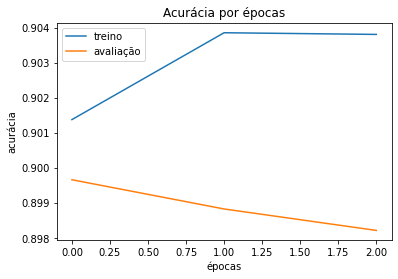

In [81]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino','avaliação'])

Visualizando as perdas de treino e validação(testes)

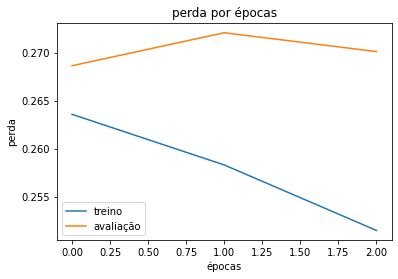

In [82]:
#Gráfico de perda 
#Under e Overfitting (Caso a linha de treino suba e a de teste caia, significa um overfitting. 
#signigica que o nosso modelo está perdendo pouca informação no treino e muita na validação)
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino','avaliação'])

#Salvando o modelo

In [84]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

treinando o modelo treinado


In [85]:
#Testando o nosso modelo salvo
testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('Resultado do teste do modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('numero de imagem teste:', id_teste[1])

Resultado do teste do modelo salvo: 2
numero de imagem teste: 2
